<a href="https://colab.research.google.com/github/Athreya99/Analytics/blob/main/DiabetesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gagan Gupta, Manoj Athreya Hallegere, Sanfer Noronha, Edison Nalluri
# 02/26/2023
# COEN 281 with Professor Farooq
# Term Project Code
# Dataset: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
# Medical Codes: https://icd.codes/icd9cm
# Presentation: https://docs.google.com/presentation/d/1TEhS6SPgM_4JT6ol8fQ1C0-M0DAk-eUOYMx4EspIEIk/edit?usp=sharing
# Ratings for COEN 281 Group Presentations: https://docs.google.com/spreadsheets/d/1SBXpebvE13_HpycbnhW41fbMZQe-TLMpSIwRIEn0j7g/edit?usp=sharing

!pip uninstall -y statsmodels
!pip install numpy scipy patsy pandas
!pip install statsmodels
!pip install --pre pycaret
!pip install matplotlib
!apt install font-manager

Found existing installation: statsmodels 0.13.5
Uninstalling statsmodels-0.13.5:
  Successfully uninstalled statsmodels-0.13.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
font-manager is already the newest version (0.7.7-0.3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


#Preping Dataset for Models

##Importing Libraries for Data Cleaning and Preprocessing

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

##Ingest Dataset from Github raw data link

In [ ]:
url = 'https://raw.githubusercontent.com/gaganSCU/COEN281/main/diabetic_data.csv'
df_raw = pd.read_csv(url)
df_raw.sample(n=15, replace=False, random_state=1)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
60753,170043306,43951986,Caucasian,Male,[50-60),?,3,1,1,14,...,No,No,No,No,No,No,No,No,Yes,NO
84068,264404190,41103801,Caucasian,Female,[50-60),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,>30
58710,166069038,85378401,Caucasian,Female,[80-90),?,1,6,1,5,...,No,No,No,No,No,No,No,No,Yes,<30
24001,81704184,21255471,Caucasian,Female,[50-60),?,2,1,1,3,...,No,No,No,No,No,No,No,No,Yes,<30
20797,72981234,8641071,Caucasian,Female,[80-90),?,1,1,7,5,...,No,No,No,No,No,No,No,No,No,NO
90453,295987730,64337463,Caucasian,Male,[70-80),?,3,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
21813,75693612,110948274,Caucasian,Female,[70-80),?,2,1,1,4,...,No,No,No,No,No,No,No,No,No,>30
59621,167600148,92227500,Caucasian,Female,[50-60),?,3,1,1,4,...,No,Down,No,No,No,No,No,Ch,Yes,NO
66917,187465122,46768518,AfricanAmerican,Male,[50-60),?,1,6,7,7,...,No,Steady,No,No,No,No,No,No,Yes,<30
74935,223909434,60626358,Caucasian,Male,[80-90),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO


##Data Cleaning/Preprocessing and Feature Engineering

In [ ]:
df = df_raw.copy(deep=True)

fields = ['race', 'gender', 'age', #'patient_nbr',
          'weight', 'admission_type_id', 'discharge_disposition_id',
          'admission_source_id', 'time_in_hospital', 'medical_specialty',
          'num_lab_procedures', 'num_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_inpatient',
          'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult',
          'insulin', 'diabetesMed', 'readmitted']

df = df[['encounter_id']+fields]

# Primary Key identfier is encounter_id if it is unique
if df['encounter_id'].is_unique:
  df = df.set_index('encounter_id')
else:
  df = df.drop(['encounter_id'], axis=1)

# Drop any rows with "None" or "Unknown/Invalid"
for field in fields:
  # df = df.loc[df[field] != "?"]
  # df = df.loc[df[field] != "None"]
  df = df.loc[df[field] != "Unknown/Invalid"]
print(df.shape)

# keep first duplicate row and drop the other duplicates
df = df.drop_duplicates()
print(df.shape)
# drop missing values
df = df.dropna()
print(df.shape)

df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(object)
df['admission_source_id'] = df['admission_source_id'].astype(object)
df['admission_type_id'] = df['admission_type_id'].astype(object)

# num non-null vals, data types of columns, and the memory usage of df
print(df.info())

# Convert age to a int64 value from range str where it is the average of the top and bottom of the range
for i in range(10):
  a = i*10
  b = (i+1)*10
  tempstr = '['+str(a)+'-'+str(b)+')'
  df.loc[df['age'] == tempstr, 'age'] = ((a+b)/2)
df.age = df.age.astype(int)

# Split the diag_# fields into the medically defined diagnosed groups
diag_ranges = [1, 140, 240, 280, 290, 320, 390, 460, 520, 580, 630, 680, 710, 740, 760, 780, 800, 1000]
diags = ['diag_1', 'diag_2', 'diag_3']
for diag in diags:
  df.loc[df[diag].str.contains('?', regex=False, na=False), diag] = -1
  df.loc[df[diag].str.contains('Other', regex=False, na=False), diag] = -1
  df.loc[df[diag].str.contains('V', regex=False, na=False), diag] = -2
  df.loc[df[diag].str.contains('E', regex=False, na=False), diag] = -3
  for i in range(len(diag_ranges)-1):
    df.loc[(df[diag].astype(float) >= diag_ranges[i]) & (df[diag].astype(float) < diag_ranges[i+1]), diag] = (i+1)
  df.loc[df[diag] == -1, diag] = 0
  df.loc[df[diag] == -2, diag] = 18
  df.loc[df[diag] == -3, diag] = 19
  df[diag] = df[diag].astype(object)

# Make readmitted a binary target classifer field
df['readmitted']=df['readmitted'].replace({"NO":"0", "<30":"1", ">30":"1"})
# Join the unknown and lower count races into the Other category
df['race']=df['race'].replace(({'Hispanic':'Other','?':'Other','Asian':'Other'}))

# Column name dictionary with on datatype as key (int64, object)
temp_col = df.columns.to_series().groupby(df.dtypes).groups
dtype_col_dict = {k.name: v for k, v in temp_col.items()}

# Label encoding for the dtype object columns
le = preprocessing.LabelEncoder()
df[dtype_col_dict['object']] = df[dtype_col_dict['object']].apply(le.fit_transform)

# Standardization (mean and std) of int64 columns
for column in dtype_col_dict['int64']:
  df[column] = (df[column] - df[column].mean()) / df[column].std()

print("-------------------------------")
# count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum
print(df.describe(include='all'))
print("-------------------------------")
# 95th percentile of field_A
print(df.quantile(0.95))
print("-------------------------------")
# num non-null vals, data types of columns, and the memory usage of df
print(df.info())
print("-------------------------------")
print(df.shape)

# Take 15 random sample rows
print(df.sample(n=15, replace=False, random_state=1))

(101763, 23)
(101763, 23)
(101763, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 2278392 to 443867222
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101763 non-null  object
 1   gender                    101763 non-null  object
 2   age                       101763 non-null  object
 3   weight                    101763 non-null  object
 4   admission_type_id         101763 non-null  int64 
 5   discharge_disposition_id  101763 non-null  object
 6   admission_source_id       101763 non-null  object
 7   time_in_hospital          101763 non-null  int64 
 8   medical_specialty         101763 non-null  object
 9   num_lab_procedures        101763 non-null  int64 
 10  num_procedures            101763 non-null  int64 
 11  num_medications           101763 non-null  int64 
 12  number_outpatient         101763 non-null  int64 
 13  number_emer

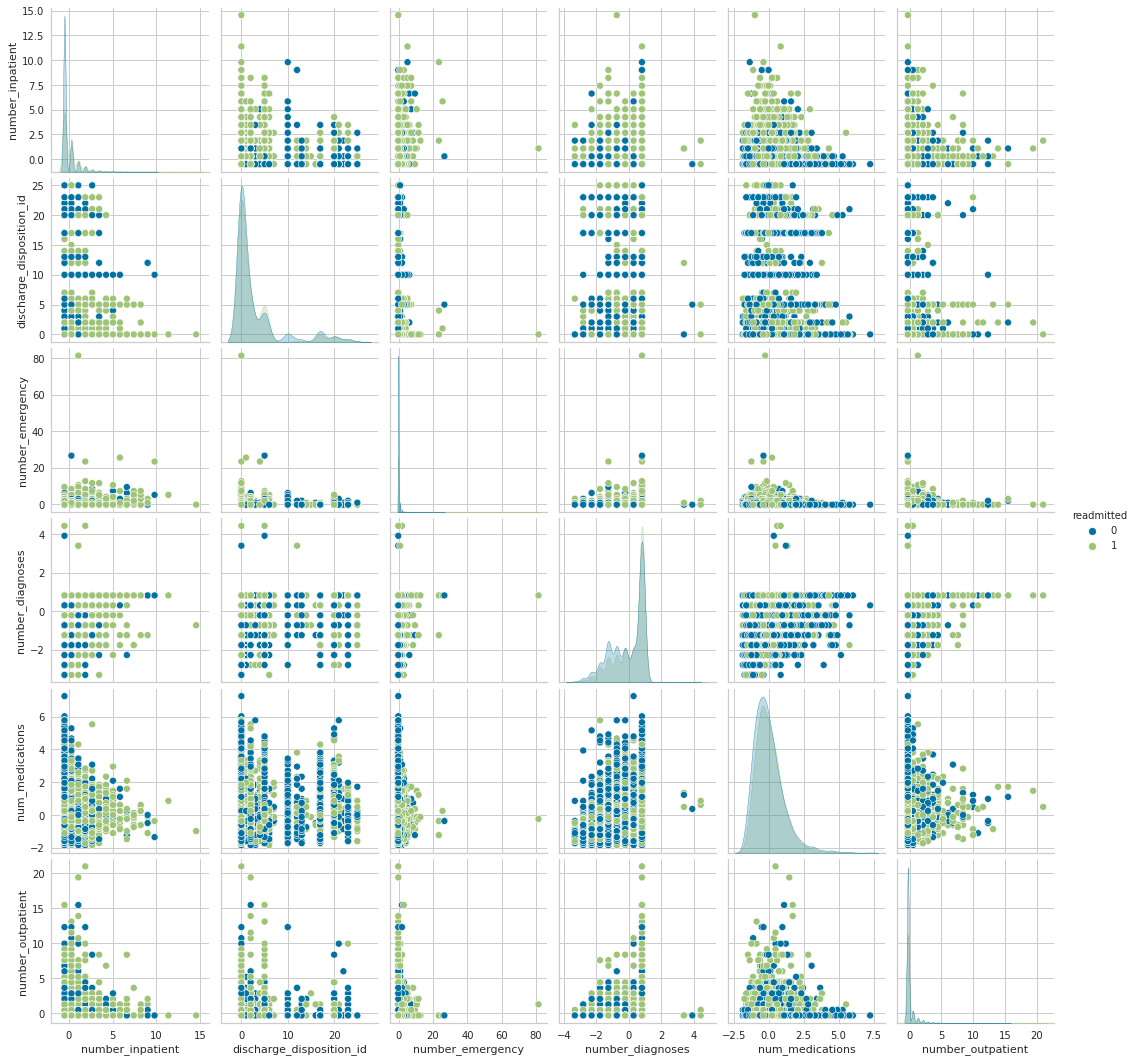

In [ ]:
df_plot = df.sample(n=10000, replace=False, random_state=1)
df_plot = df_plot[['number_inpatient', 'discharge_disposition_id', 'number_emergency', 'number_diagnoses', 'num_medications', 'number_outpatient', 'readmitted']]
# df_plot['discharge_disposition_id'] = df_plot['discharge_disposition_id'].apply(le.inverse_transform)
sns.set_style('whitegrid')
sns.pairplot(df_plot, hue = 'readmitted')


#Training Different Models

##Model imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

##Random Forest Classifier

In [ ]:
#features and targets
features = np.array(df.drop('readmitted', axis=1))
targets = np.array(df['readmitted'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

In [ ]:
rf = RandomForestClassifier(max_depth = 10, n_estimators = 200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))

Accuracy: 0.6412322507738417


In [ ]:
imp = []
for colName, importance in zip(df.drop('readmitted',axis = 1).columns, rf.feature_importances_) :
    imp.append((colName, importance))
imp = [(key, val) for key, val in sorted(imp, key = lambda x : x[1], reverse = True)]


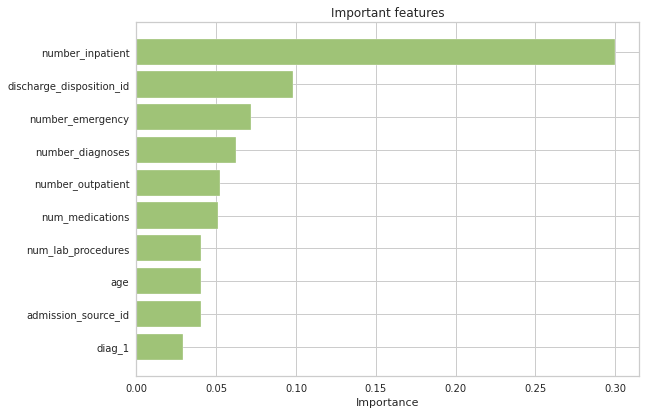

In [ ]:
imp1 = imp[0:10]
plt.figure(figsize=(9, 6.5))
plt.barh(range(len(imp1))[::-1], [x[1]  for x in imp1] , align='center', color = 'g')
plt.yticks(range(len(imp1))[::-1], [x[0]  for x in imp1], )
plt.xlabel('Importance')
plt.title('Important features')
plt.show()

In [ ]:
rf = RandomForestClassifier()
RF_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 6, 8, 10, 12]}
grid = GridSearchCV(rf, RF_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(X_train, y_train)
accuracy = grid_search.best_score_ *100
print(accuracy)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
64.01424886377595


In [ ]:
rf_model = grid_search.best_estimator_
#rf_model.fit(data_trainn_x, data_trainn_y)
predicted_prob = rf_model.predict_proba(X_test)[:, 1]
predicted = rf_model.predict(X_test)
AUC_RF = roc_auc_score(y_test, predicted_prob)
print('AUC_RF = ', AUC_RF)
f1_pos = f1_score(y_test, predicted)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_RF = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_RF =', HARMONIC_F1_RF)

AUC_RF =  0.6983784394474393
F1_POS =  0.5567939582191365 F1_NEG =  0.7003746860460328
Harmonic_F1_RF = 0.6203851733957215


In [ ]:
cm_rf = confusion_matrix(y_test, predicted)

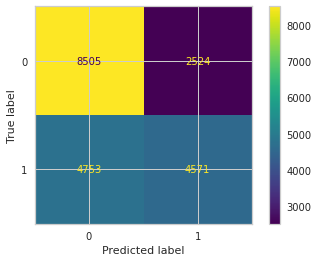

In [ ]:
ConfusionMatrixDisplay(cm_rf).plot()

##LGBM Classifier

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.650027023043286
              precision    recall  f1-score   support

           0       0.66      0.74      0.70     11029
           1       0.64      0.55      0.59      9324

    accuracy                           0.65     20353
   macro avg       0.65      0.64      0.64     20353
weighted avg       0.65      0.65      0.65     20353

[[8143 2886]
 [4237 5087]]


In [ ]:
predicted_prob = lgbm.predict_proba(X_test)[:, 1]
AUC_RF = roc_auc_score(y_test, predicted_prob)
print('AUC_RF = ', AUC_RF)
f1_pos = f1_score(y_test, y_pred)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_RF = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_RF =', HARMONIC_F1_RF)

AUC_RF =  0.7046333602231689
F1_POS =  0.588194484592704 F1_NEG =  0.7003746860460328
Harmonic_F1_RF = 0.6394014956549341


##XGB Classifier

In [ ]:
xgbm = XGBClassifier()
xgbm.fit(X_train,y_train)
y_pred = xgbm.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6449172112219329
              precision    recall  f1-score   support

           0       0.66      0.72      0.69     11029
           1       0.63      0.56      0.59      9324

    accuracy                           0.64     20353
   macro avg       0.64      0.64      0.64     20353
weighted avg       0.64      0.64      0.64     20353

[[7925 3104]
 [4123 5201]]


In [ ]:
predicted_prob = xgbm.predict_proba(X_test)[:, 1]
AUC_RF = roc_auc_score(y_test, predicted_prob)
print('AUC_RF = ', AUC_RF)
f1_pos = f1_score(y_test, y_pred)
f1_neg = f1_score([0 if x == 1 else 1 for x in y_test], [0 if x == 1 else 1 for x in predicted])
print('F1_POS = ', f1_pos, 'F1_NEG = ', f1_neg)
HARMONIC_F1_RF = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print('Harmonic_F1_RF =', HARMONIC_F1_RF)

AUC_RF =  0.6996810386283593
F1_POS =  0.5900504849963129 F1_NEG =  0.7003746860460328
Harmonic_F1_RF = 0.6404965316149136
